In [1]:
import sys
import os
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from selenium import webdriver
import time
import tqdm
from tqdm import tqdm_notebook

In [2]:
query_txt="칼부림"
start_date="20230731"
end_date="20200804"

In [3]:
pwd

'C:\\Users\\Suhyeon\\Desktop\\newstitle_crawler'

In [4]:
path = "chromedriver.exe"

driver = webdriver.Chrome(path)
driver.get('http://www.naver.com')
time.sleep(2)

element = driver.find_element_by_id("query")
element.send_keys(query_txt)
element.submit()
driver.find_element_by_link_text("뉴스").click()

In [31]:
titles = "a.news_tit"
article_raw = driver.find_elements_by_css_selector(titles)
article_raw[1].text

'“잠실역 20명 죽인다” “한티역 칼부림 예정” 또 살인 예고글'

In [32]:
# overlays = "._sp_each_url" 
overlays = "a.news_tit" 
urls = driver.find_elements_by_css_selector(overlays)
urls[0].get_attribute('href')

'https://www.dt.co.kr/contents.html?article_no=2023080402109919607005&ref=naver'

In [33]:
url_list = []
title_list = []

total_page = 10
for i in tqdm_notebook(range(0, total_page)):
    i = i * 10 + 1
    url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EC%B9%BC%EB%B6%80%EB%A6%BC&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=30&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={1}1".format(query_txt, i)
    driver.get(url)
    time.sleep(0.5)
    
    
    titles = "a.news_tit"
    articles = "a.news_tit"
    article_raw = driver.find_elements_by_css_selector(titles)
    article_list = driver.find_elements_by_css_selector(articles)
   
    # url 크롤링 시작
    for article in article_raw:
        url = article.get_attribute('href')   
        url_list.append(url)
    
    # 제목 크롤링 시작    
    for article in article_raw:
        title = article.text   
        title_list.append(title)
    
        print(title)
    
print('url갯수: ', len(url_list))

df = pd.DataFrame({'url':url_list, 'title':title_list})

# 저장하기
df.to_excel("news_url.xlsx")

  0%|          | 0/10 [00:00<?, ?it/s]

[속보] 대전서 교사 상대 칼부림…20~30대 면식범 추정
"전 여친 집 근처서 칼부림한다" 곳곳 '살인예고' 글 잇따라(종합)
"엄마, 나 죽는줄 알았어"…서현역 칼부림 피해자가 전한 급박 상황
'서현역 칼부림' 범인, 선글라스에 모자까지 뒤집어쓴 이유
[속보] 대구 PC방 칼부림? 대구경찰청 "사실이 아닙니다"
'대통령 폭탄테러' 이어 '칼부림 예고 목록'까지..."살인예비죄"
잇단 칼부림 테러에…법무부 "가석방 없는 종신형 신설 검토"
"금요일 오리역서 칼부림"‥잇단 범행 예고에 수사
대전 고교서 교사에 칼부림…용의자 검거
"서현역 칼부림, 재난문자 보냈어야" 시끌…성남시에 물었더니
소방당국 "분당 흉기 테러 피해자 중 2명 뇌사 가능성"
[속보] 경찰 "대전 고등학교 칼부림 용의자 검거"
서현역 칼부림 범인 '부모차'로 범행…"내 차가 왜 거기에"
"꼭 건강해 지시길"…끝까지 칼부림 피해자 지킨 고등학생
[속보] 분당 서현역 인근 칼부림…부상자 다수
대전 칼부림 용의자 검거…피해자 긴급 수술
[1보] 대전 대덕구 고등학교서 칼부림…교사 피습
서현역도 '묻지마 칼부림'…한동훈發 '괴물 평생 종신형' 탄력?
'칼부림 예고 목록' 글 온라인에 퍼져...尹 "무고한 시민에 대한 테러"
대구 PC방 칼부림 루머 확산하자 경찰 "발생한 적 없다"
서울시내 '살인예고' 21건.....하루만에 11건↑·대통령 테러 협박도
“흉기男 다가왔지만…살리고 보자” 서현역 칼부림 부상자 구한 17살 윤도일...
대전 대덕구 고교서 교사에 칼부림‥교무실 무단 들어온 외부인이‥
“금요일 오리역서 칼부림한다, 최대한 많이” 흉기난동 예고 또 확산
오리역 이어 잠실역·한티역도…'묻지마 범죄' 예고글 기승
"우려가 현실로"…서현 '묻지마 칼부림'에 시민들 '비명' [현장+]
[속보] 대전 대덕구 고등학교서 칼부림…교사 의식 없어
온라인·SNS 확산 '포천 터미널 칼부림·방화 사건'은 가짜뉴스
대전 대덕구 한 고등학교서 칼부림… 피해자 병원 이송
'서현역 칼부림' 범인은 20대 남성 배달

In [34]:
import sys
import os
import pandas as pd
import numpy as np

In [35]:
# "news_url.csv" 불러오기
url_load = pd.read_excel("news_url.xlsx")

num_list = len(url_load)

print(num_list)
url_load

100


,Unnamed: 0,url,title
0,0,https://news.kmib.co.kr/article/view.asp?arcid...,[속보] 대전서 교사 상대 칼부림…20~30대 면식범 추정
1,1,https://www.news1.kr/articles/5130635,"""전 여친 집 근처서 칼부림한다"" 곳곳 '살인예고' 글 잇따라(종합)"
2,2,https://www.news1.kr/articles/5130547,"""엄마, 나 죽는줄 알았어""…서현역 칼부림 피해자가 전한 급박 상황"
3,3,http://www.edaily.co.kr/news/newspath.asp?news...,"'서현역 칼부림' 범인, 선글라스에 모자까지 뒤집어쓴 이유"
4,4,https://news.imaeil.com/page/view/202308041208...,"[속보] 대구 PC방 칼부림? 대구경찰청 ""사실이 아닙니다"""
...,...,...,...
95,95,http://www.edaily.co.kr/news/newspath.asp?news...,"수원서 '묻지마 칼부림' 40대男, 구속…法 ""도주 우려"""
96,96,http://www.newsis.com/view/?id=NISI20230726_00...,"신림역 묻지마 칼부림 희생자 추모공간, 27일까지 운영"
97,97,https://www.donga.com/news/Society/article/all...,"대낮 신림역 인근서 칼부림…1명 사망, 3명 부상"
98,98,https://sports.hankooki.com/news/articleView.h...,'궁금한 이야기Y' 신림동 칼부림 사건 다룬다…그가 칼 든 진짜 이유는


# 기사 제목 텍스트 분석

In [36]:
import scipy as sp
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()  
rc('font', family=font_name)

# 워닝 없애주기
import warnings

In [37]:
# 한글 자연어 처리 라이브러리
from konlpy.tag import Kkma       ; kkma = Kkma()
from konlpy.tag import Hannanum   ; hannanum = Hannanum()
from konlpy.tag import Okt        ; t = Okt()
from konlpy.tag import *
import pickle

In [38]:
df_r = pd.read_excel("news_url.xlsx")
df_r

,Unnamed: 0,url,title
0,0,https://news.kmib.co.kr/article/view.asp?arcid...,[속보] 대전서 교사 상대 칼부림…20~30대 면식범 추정
1,1,https://www.news1.kr/articles/5130635,"""전 여친 집 근처서 칼부림한다"" 곳곳 '살인예고' 글 잇따라(종합)"
2,2,https://www.news1.kr/articles/5130547,"""엄마, 나 죽는줄 알았어""…서현역 칼부림 피해자가 전한 급박 상황"
3,3,http://www.edaily.co.kr/news/newspath.asp?news...,"'서현역 칼부림' 범인, 선글라스에 모자까지 뒤집어쓴 이유"
4,4,https://news.imaeil.com/page/view/202308041208...,"[속보] 대구 PC방 칼부림? 대구경찰청 ""사실이 아닙니다"""
...,...,...,...
95,95,http://www.edaily.co.kr/news/newspath.asp?news...,"수원서 '묻지마 칼부림' 40대男, 구속…法 ""도주 우려"""
96,96,http://www.newsis.com/view/?id=NISI20230726_00...,"신림역 묻지마 칼부림 희생자 추모공간, 27일까지 운영"
97,97,https://www.donga.com/news/Society/article/all...,"대낮 신림역 인근서 칼부림…1명 사망, 3명 부상"
98,98,https://sports.hankooki.com/news/articleView.h...,'궁금한 이야기Y' 신림동 칼부림 사건 다룬다…그가 칼 든 진짜 이유는


In [39]:
df_r['title']

0            [속보] 대전서 교사 상대 칼부림…20~30대 면식범 추정
1      "전 여친 집 근처서 칼부림한다" 곳곳 '살인예고' 글 잇따라(종합)
2       "엄마, 나 죽는줄 알았어"…서현역 칼부림 피해자가 전한 급박 상황
3            '서현역 칼부림' 범인, 선글라스에 모자까지 뒤집어쓴 이유
4           [속보] 대구 PC방 칼부림? 대구경찰청 "사실이 아닙니다"
                       ...                   
95           수원서 '묻지마 칼부림' 40대男, 구속…法 "도주 우려"
96             신림역 묻지마 칼부림 희생자 추모공간, 27일까지 운영
97                대낮 신림역 인근서 칼부림…1명 사망, 3명 부상
98    '궁금한 이야기Y' 신림동 칼부림 사건 다룬다…그가 칼 든 진짜 이유는
99            ‘신림 살해범’ 조선 신상공개했지만… 여전한 실효성 논란
Name: title, Length: 100, dtype: object

In [40]:
title_list = df_r.title.values.tolist()

print(len(title_list))
title_list

100


['[속보] 대전서 교사 상대 칼부림…20~30대 면식범 추정',
 '"전 여친 집 근처서 칼부림한다" 곳곳 \'살인예고\' 글 잇따라(종합)',
 '"엄마, 나 죽는줄 알았어"…서현역 칼부림 피해자가 전한 급박 상황',
 "'서현역 칼부림' 범인, 선글라스에 모자까지 뒤집어쓴 이유",
 '[속보] 대구 PC방 칼부림? 대구경찰청 "사실이 아닙니다"',
 '\'대통령 폭탄테러\' 이어 \'칼부림 예고 목록\'까지..."살인예비죄"',
 '잇단 칼부림 테러에…법무부 "가석방 없는 종신형 신설 검토"',
 '"금요일 오리역서 칼부림"‥잇단 범행 예고에 수사',
 '대전 고교서 교사에 칼부림…용의자 검거',
 '"서현역 칼부림, 재난문자 보냈어야" 시끌…성남시에 물었더니',
 '소방당국 "분당 흉기 테러 피해자 중 2명 뇌사 가능성"',
 '[속보] 경찰 "대전 고등학교 칼부림 용의자 검거"',
 '서현역 칼부림 범인 \'부모차\'로 범행…"내 차가 왜 거기에"',
 '"꼭 건강해 지시길"…끝까지 칼부림 피해자 지킨 고등학생',
 '[속보] 분당 서현역 인근 칼부림…부상자 다수',
 '대전 칼부림 용의자 검거…피해자 긴급 수술',
 '[1보] 대전 대덕구 고등학교서 칼부림…교사 피습',
 "서현역도 '묻지마 칼부림'…한동훈發 '괴물 평생 종신형' 탄력?",
 '\'칼부림 예고 목록\' 글 온라인에 퍼져...尹 "무고한 시민에 대한 테러"',
 '대구 PC방 칼부림 루머 확산하자 경찰 "발생한 적 없다"',
 "서울시내 '살인예고' 21건.....하루만에 11건↑·대통령 테러 협박도",
 '“흉기男 다가왔지만…살리고 보자” 서현역 칼부림 부상자 구한 17살 윤도일...',
 '대전 대덕구 고교서 교사에 칼부림‥교무실 무단 들어온 외부인이‥',
 '“금요일 오리역서 칼부림한다, 최대한 많이” 흉기난동 예고 또 확산',
 "오리역 이어 잠실역·한티역도…'묻지마 범죄' 예고글 기승",
 '"우려가 현실로"…서현 \'묻지마 칼부림\'에 시민들 \'비명\' [현장+]',
 '

In [41]:
import nltk
from konlpy.tag import Okt; t = Okt()

In [42]:
# 리스트 중 str 타입이 아닌 요소 존재 확인
for i in title_list:
    if type(i) == float:
        i = str(i)
        print(i)

In [43]:
# str 타입이 아닌 요소들이 있으면 전부 str 타입으로 변경
for i in range(len(title_list)):
    if type(title_list[i]) != str:
        title_list[i] = str(title_list[i])

In [44]:
content_text = ''

for each_line in title_list[:2000]:
    content_text = content_text + each_line + '\n'

In [45]:
content_text

'[속보] 대전서 교사 상대 칼부림…20~30대 면식범 추정\n"전 여친 집 근처서 칼부림한다" 곳곳 \'살인예고\' 글 잇따라(종합)\n"엄마, 나 죽는줄 알았어"…서현역 칼부림 피해자가 전한 급박 상황\n\'서현역 칼부림\' 범인, 선글라스에 모자까지 뒤집어쓴 이유\n[속보] 대구 PC방 칼부림? 대구경찰청 "사실이 아닙니다"\n\'대통령 폭탄테러\' 이어 \'칼부림 예고 목록\'까지..."살인예비죄"\n잇단 칼부림 테러에…법무부 "가석방 없는 종신형 신설 검토"\n"금요일 오리역서 칼부림"‥잇단 범행 예고에 수사\n대전 고교서 교사에 칼부림…용의자 검거\n"서현역 칼부림, 재난문자 보냈어야" 시끌…성남시에 물었더니\n소방당국 "분당 흉기 테러 피해자 중 2명 뇌사 가능성"\n[속보] 경찰 "대전 고등학교 칼부림 용의자 검거"\n서현역 칼부림 범인 \'부모차\'로 범행…"내 차가 왜 거기에"\n"꼭 건강해 지시길"…끝까지 칼부림 피해자 지킨 고등학생\n[속보] 분당 서현역 인근 칼부림…부상자 다수\n대전 칼부림 용의자 검거…피해자 긴급 수술\n[1보] 대전 대덕구 고등학교서 칼부림…교사 피습\n서현역도 \'묻지마 칼부림\'…한동훈發 \'괴물 평생 종신형\' 탄력?\n\'칼부림 예고 목록\' 글 온라인에 퍼져...尹 "무고한 시민에 대한 테러"\n대구 PC방 칼부림 루머 확산하자 경찰 "발생한 적 없다"\n서울시내 \'살인예고\' 21건.....하루만에 11건↑·대통령 테러 협박도\n“흉기男 다가왔지만…살리고 보자” 서현역 칼부림 부상자 구한 17살 윤도일...\n대전 대덕구 고교서 교사에 칼부림‥교무실 무단 들어온 외부인이‥\n“금요일 오리역서 칼부림한다, 최대한 많이” 흉기난동 예고 또 확산\n오리역 이어 잠실역·한티역도…\'묻지마 범죄\' 예고글 기승\n"우려가 현실로"…서현 \'묻지마 칼부림\'에 시민들 \'비명\' [현장+]\n[속보] 대전 대덕구 고등학교서 칼부림…교사 의식 없어\n온라인·SNS 확산 \'포천 터미널 칼부림·방화 사건\'은 가짜뉴스

## 형태소분석을 마친 단어로 (token_ko)

In [46]:
tokens_ko = t.morphs(content_text) # 명사 분석 
tokens_ko

['[',
 '속보',
 ']',
 '대전',
 '서',
 '교사',
 '상대',
 '칼부림',
 '…',
 '20~30',
 '대',
 '면식',
 '범',
 '추정',
 '\n',
 '"',
 '전',
 '여친',
 '집',
 '근처',
 '서',
 '칼부림',
 '한다',
 '"',
 '곳곳',
 "'",
 '살인',
 '예고',
 "'",
 '글',
 '잇따라',
 '(',
 '종합',
 ')',
 '\n',
 '"',
 '엄마',
 ',',
 '나',
 '죽는줄',
 '알았어',
 '"…',
 '서현역',
 '칼부림',
 '피해자',
 '가',
 '전',
 '한',
 '급박',
 '상황',
 '\n',
 "'",
 '서현역',
 '칼부림',
 "'",
 '범인',
 ',',
 '선글라스',
 '에',
 '모자',
 '까지',
 '뒤집어',
 '쓴',
 '이유',
 '\n',
 '[',
 '속보',
 ']',
 '대구',
 'PC',
 '방',
 '칼부림',
 '?',
 '대구',
 '경찰청',
 '"',
 '사실',
 '이',
 '아닙니다',
 '"',
 '\n',
 "'",
 '대통령',
 '폭탄',
 '테러',
 "'",
 '이어',
 "'",
 '칼부림',
 '예고',
 '목록',
 "'",
 '까지',
 '..."',
 '살인',
 '예비',
 '죄',
 '"',
 '\n',
 '잇단',
 '칼부림',
 '테러',
 '에',
 '…',
 '법무부',
 '"',
 '가석방',
 '없는',
 '종신형',
 '신설',
 '검토',
 '"',
 '\n',
 '"',
 '금요일',
 '오리역',
 '서',
 '칼부림',
 '"',
 '‥',
 '잇단',
 '범행',
 '예고',
 '에',
 '수사',
 '\n',
 '대전',
 '고교',
 '서',
 '교사',
 '에',
 '칼부림',
 '…',
 '용의자',
 '검거',
 '\n',
 '"',
 '서현역',
 '칼부림',
 ',',
 '재난',
 '문자',
 '보냈어야',
 '"',
 '시',
 '끌'

In [47]:
ko = nltk.Text(tokens_ko)   
print(len(ko.tokens))          # 토큰 전체 갯수
print(len(set(ko.tokens)))     # 토큰 unique 갯수

1524
492


In [48]:
ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)    # 가장 많이 나온 단어 100개 선정

[('\n', 100),
 ("'", 78),
 ('칼부림', 77),
 ('"', 58),
 ('…', 37),
 (',', 29),
 ('서', 26),
 ('서현역', 26),
 ('[', 24),
 (']', 22),
 ('에', 20),
 ('대전', 19),
 ('·', 19),
 ('명', 18),
 ('고등학교', 16),
 ('...', 16),
 ('흉기', 15),
 ('묻지마', 15),
 ('속보', 14),
 ('예고', 14),
 ('살인', 13),
 ('대덕구', 13),
 ('피해자', 12),
 ('경찰', 12),
 ('분당', 11),
 ('“', 11),
 ('난동', 11),
 ('교사', 10),
 ('대', 10),
 ('검거', 10),
 ('사건', 10),
 ('테러', 8),
 ('오리역', 8),
 ('용의자', 8),
 ('”', 8),
 ('신림동', 8),
 ('범', 7),
 ('한', 7),
 ('범행', 7),
 ('부상', 7),
 ('범인', 6),
 ('피습', 6),
 ('도', 6),
 ('‘', 6),
 ('’', 6),
 ('글', 5),
 ('까지', 5),
 ('금요일', 5),
 ('수사', 5),
 ('시민', 5),
 ('확산', 5),
 ('범죄', 5),
 ('조선', 5),
 ('"…', 4),
 ('가', 4),
 ('중', 4),
 ('뇌사', 4),
 ('가능성', 4),
 ('자', 4),
 ('1', 4),
 ("'…", 4),
 ('또', 4),
 ('은', 4),
 ('오늘', 4),
 ('부산', 4),
 ('신림', 4),
 ('신림역', 4),
 ('면식', 3),
 ('추정', 3),
 ('전', 3),
 ('한다', 3),
 ('(', 3),
 (')', 3),
 ('이유', 3),
 ('대구', 3),
 ('?', 3),
 ('이어', 3),
 ('목록', 3),
 ('예비', 3),
 ('죄', 3),
 ('종신형', 3),
 ('‥', 3),


In [49]:
# 불용어 : 인터넷 검색 시 검색 용어로 사용하지 않는 단어. 관사, 전치사, 조사, 접속사 등 검색 색인 단어로 의미가 없는 단어
stop_words = [')','?','1','"(', '_', ')/','\n','.',',', '<','!','(','(', '??','..', '4', '|', '>', '?(', '"…', '#', '&', '・', "']",'.',' ','/',"'",'’','”','“','·', '[','!','\n','·','‘','"','\n ',']',':','…',')','(','-', 'nan','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','라고','중요한','합','가요','....','보이','네','무지','했습니다',
              '이다','대해','에게','입니다','있다','사람','대한','3','합니다','및','장','에서','하고','검','한다','만',
             '적', '성', '삼', '등', '전', '인', '그', '했다', '와', '위', '해', '권', '된', '서', '말', '분']

tokens_ko = [each_word for each_word in tokens_ko
             if each_word not in stop_words]

# 토큰 빈도수 확인

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(50)

[('칼부림', 77),
 ('서현역', 26),
 ('대전', 19),
 ('명', 18),
 ('고등학교', 16),
 ('흉기', 15),
 ('묻지마', 15),
 ('속보', 14),
 ('예고', 14),
 ('살인', 13),
 ('대덕구', 13),
 ('피해자', 12),
 ('경찰', 12),
 ('분당', 11),
 ('난동', 11),
 ('교사', 10),
 ('검거', 10),
 ('사건', 10),
 ('테러', 8),
 ('오리역', 8),
 ('용의자', 8),
 ('신림동', 8),
 ('범', 7),
 ('범행', 7),
 ('부상', 7),
 ('범인', 6),
 ('피습', 6),
 ('글', 5),
 ('까지', 5),
 ('금요일', 5),
 ('수사', 5),
 ('시민', 5),
 ('확산', 5),
 ('범죄', 5),
 ('조선', 5),
 ('뇌사', 4),
 ('가능성', 4),
 ('자', 4),
 ("'…", 4),
 ('또', 4),
 ('오늘', 4),
 ('부산', 4),
 ('신림', 4),
 ('신림역', 4),
 ('면식', 3),
 ('추정', 3),
 ('이유', 3),
 ('대구', 3),
 ('이어', 3),
 ('목록', 3)]

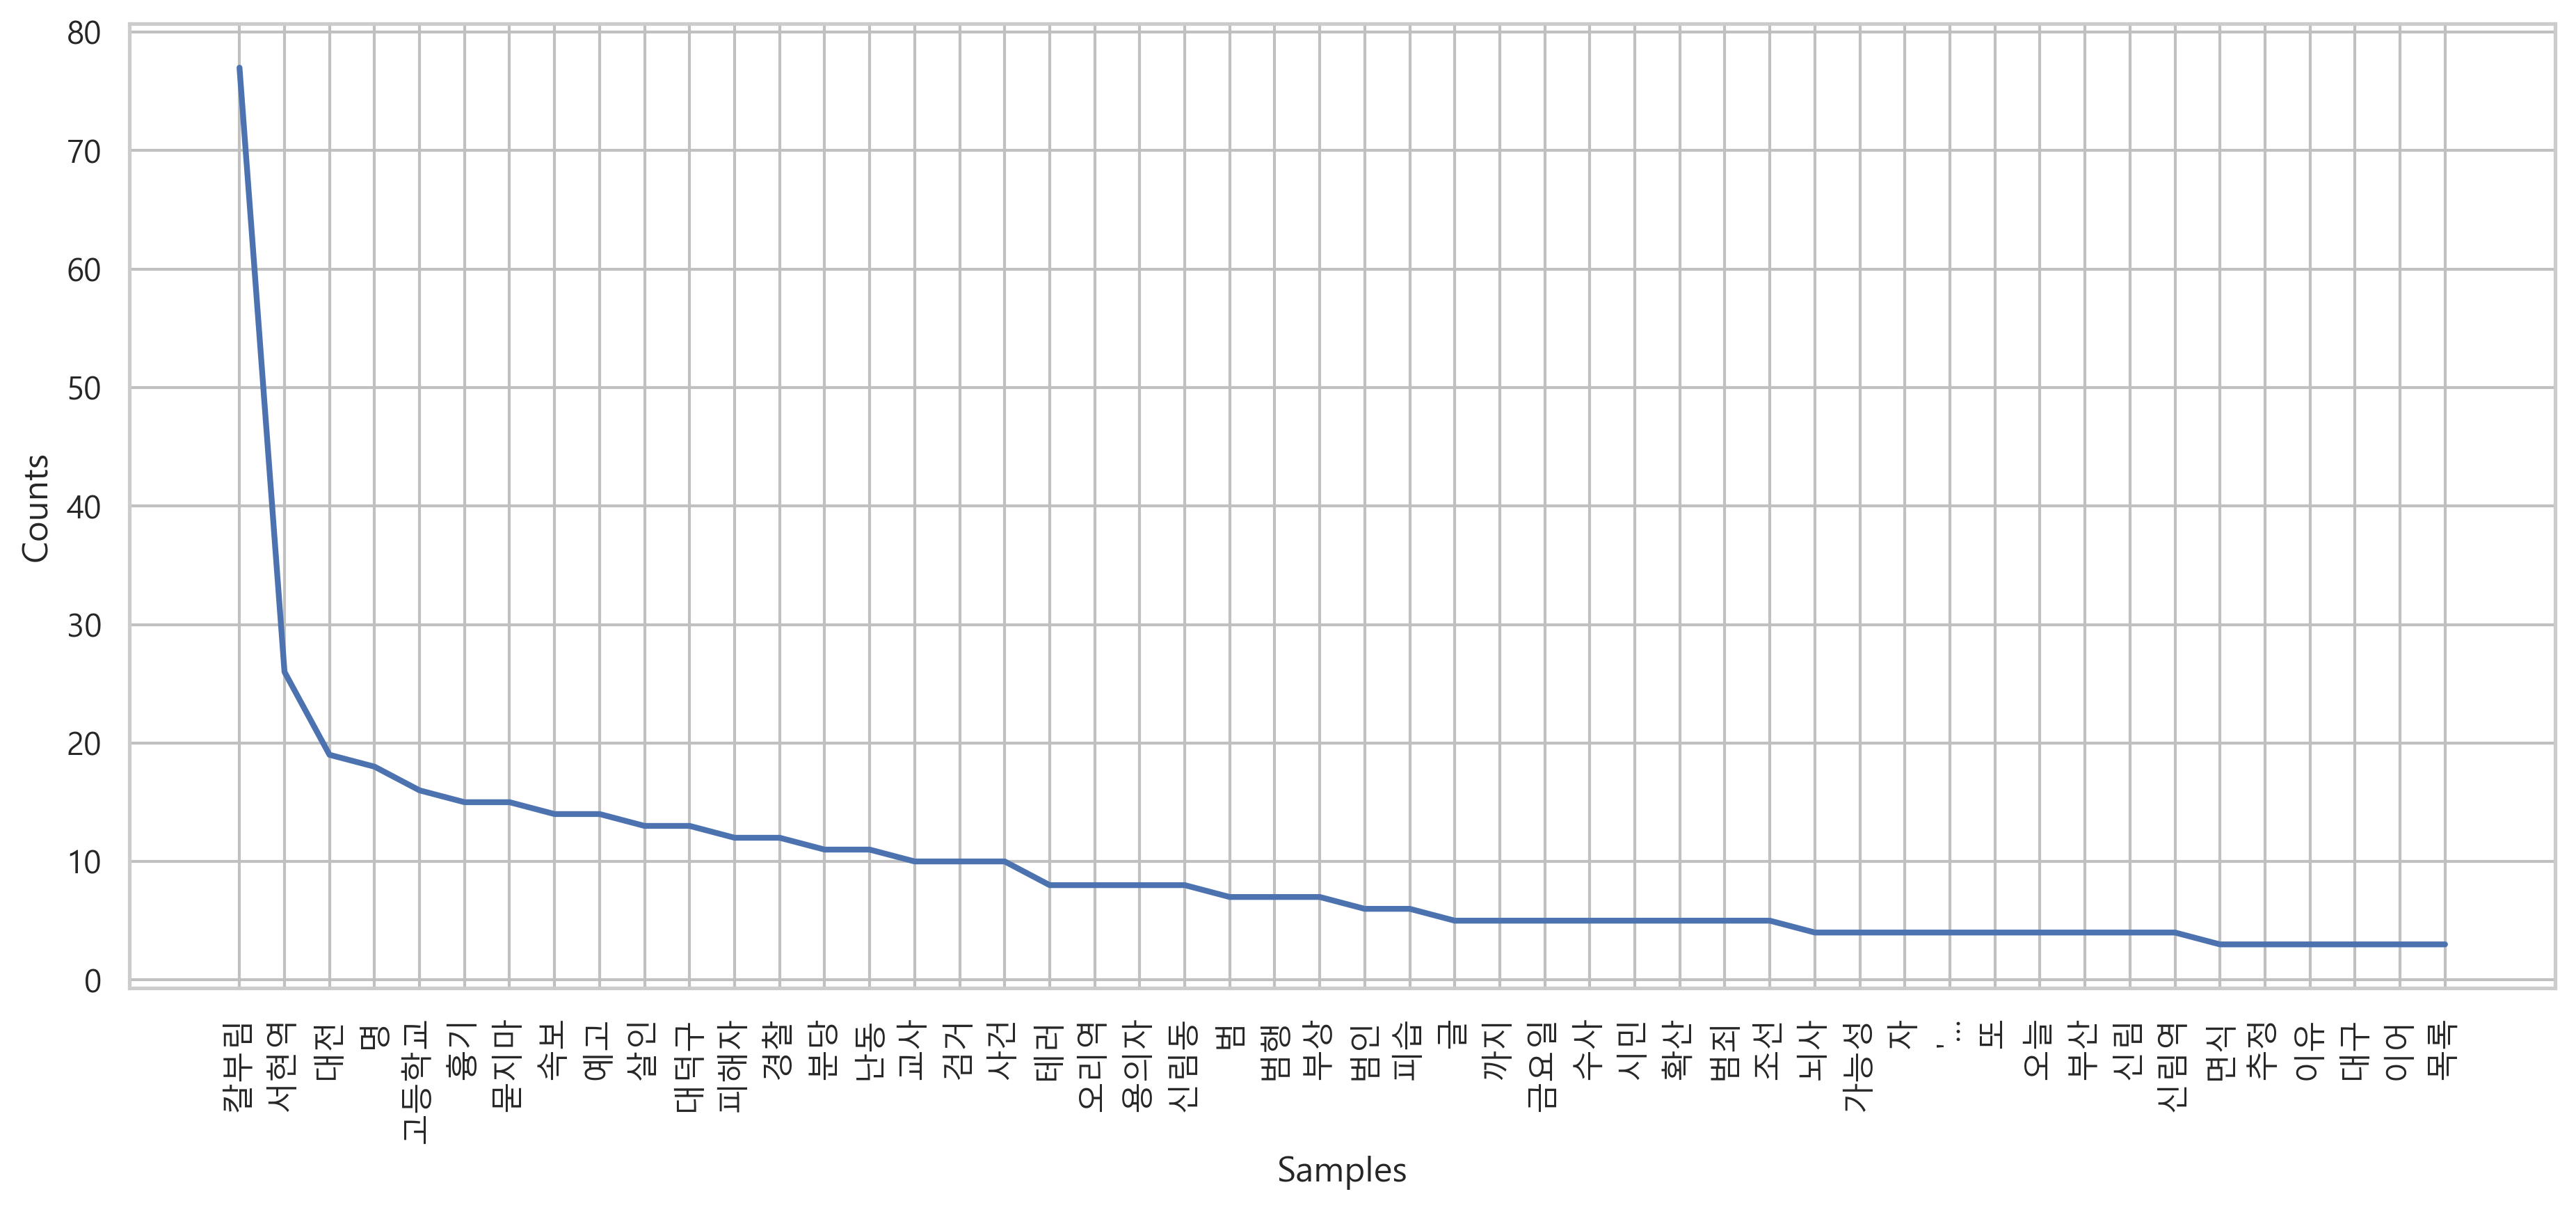

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz             
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [51]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [27]:
data = ko.vocab().most_common(300)

print(len(data))
data

300


[('칼부림', 78),
 ('서현역', 26),
 ('명', 21),
 ('대전', 19),
 ('속보', 18),
 ('분당', 18),
 ('묻지마', 18),
 ('예고', 17),
 ('흉기', 16),
 ('살인', 15),
 ('고등학교', 14),
 ('경찰', 13),
 ('난동', 13),
 ('사건', 12),
 ('피해자', 12),
 ('교사', 11),
 ('대덕구', 11),
 ('부상', 9),
 ('용의자', 8),
 ('테러', 8),
 ('오리역', 8),
 ('검거', 7),
 ('피습', 7),
 ('범행', 6),
 ('확산', 6),
 ('발생', 6),
 ('14', 6),
 ('범죄', 6),
 ('글', 5),
 ('범인', 5),
 ('까지', 5),
 ('금요일', 5),
 ("'…", 5),
 ('서현', 5),
 ('신림역', 5),
 ('범', 4),
 ('체포', 4),
 ('종신형', 4),
 ('뇌사', 4),
 ('가능성', 4),
 ('시민', 4),
 ('신림', 4),
 ('조선', 4),
 ('도주', 3),
 ('남성', 3),
 ('가석방', 3),
 ('없는', 3),
 ('수사', 3),
 ('대구', 3),
 ('이어', 3),
 ('예비', 3),
 ('죄', 3),
 ('긴급', 3),
 ('왜', 3),
 ('인근', 3),
 ('자', 3),
 ('다수', 3),
 ('尹', 3),
 ('또', 3),
 ('부산', 3),
 ('서면역', 3),
 ('뒤', 3),
 ('피해', 3),
 ('잇따른', 3),
 ('추진', 3),
 ('피의자', 3),
 ('차량', 3),
 ('13', 3),
 ('처벌', 3),
 ('사망', 3),
 ('신림동', 3),
 ('男', 3),
 ('면식', 2),
 ('추정', 2),
 ('잇따라', 2),
 ('종합', 2),
 ('고교', 2),
 ('쓴', 2),
 ('이유', 2),
 ('잇단', 2),
 ('신설', 2),
 ('

In [28]:
# list tuple을 딕셔너리로 만들어주는 함수
def todict(list_tuple):    
    todict = {}
    for i in range(0,len(list_tuple)):
        todict[data[i][0]] = data[i][1]
    return todict

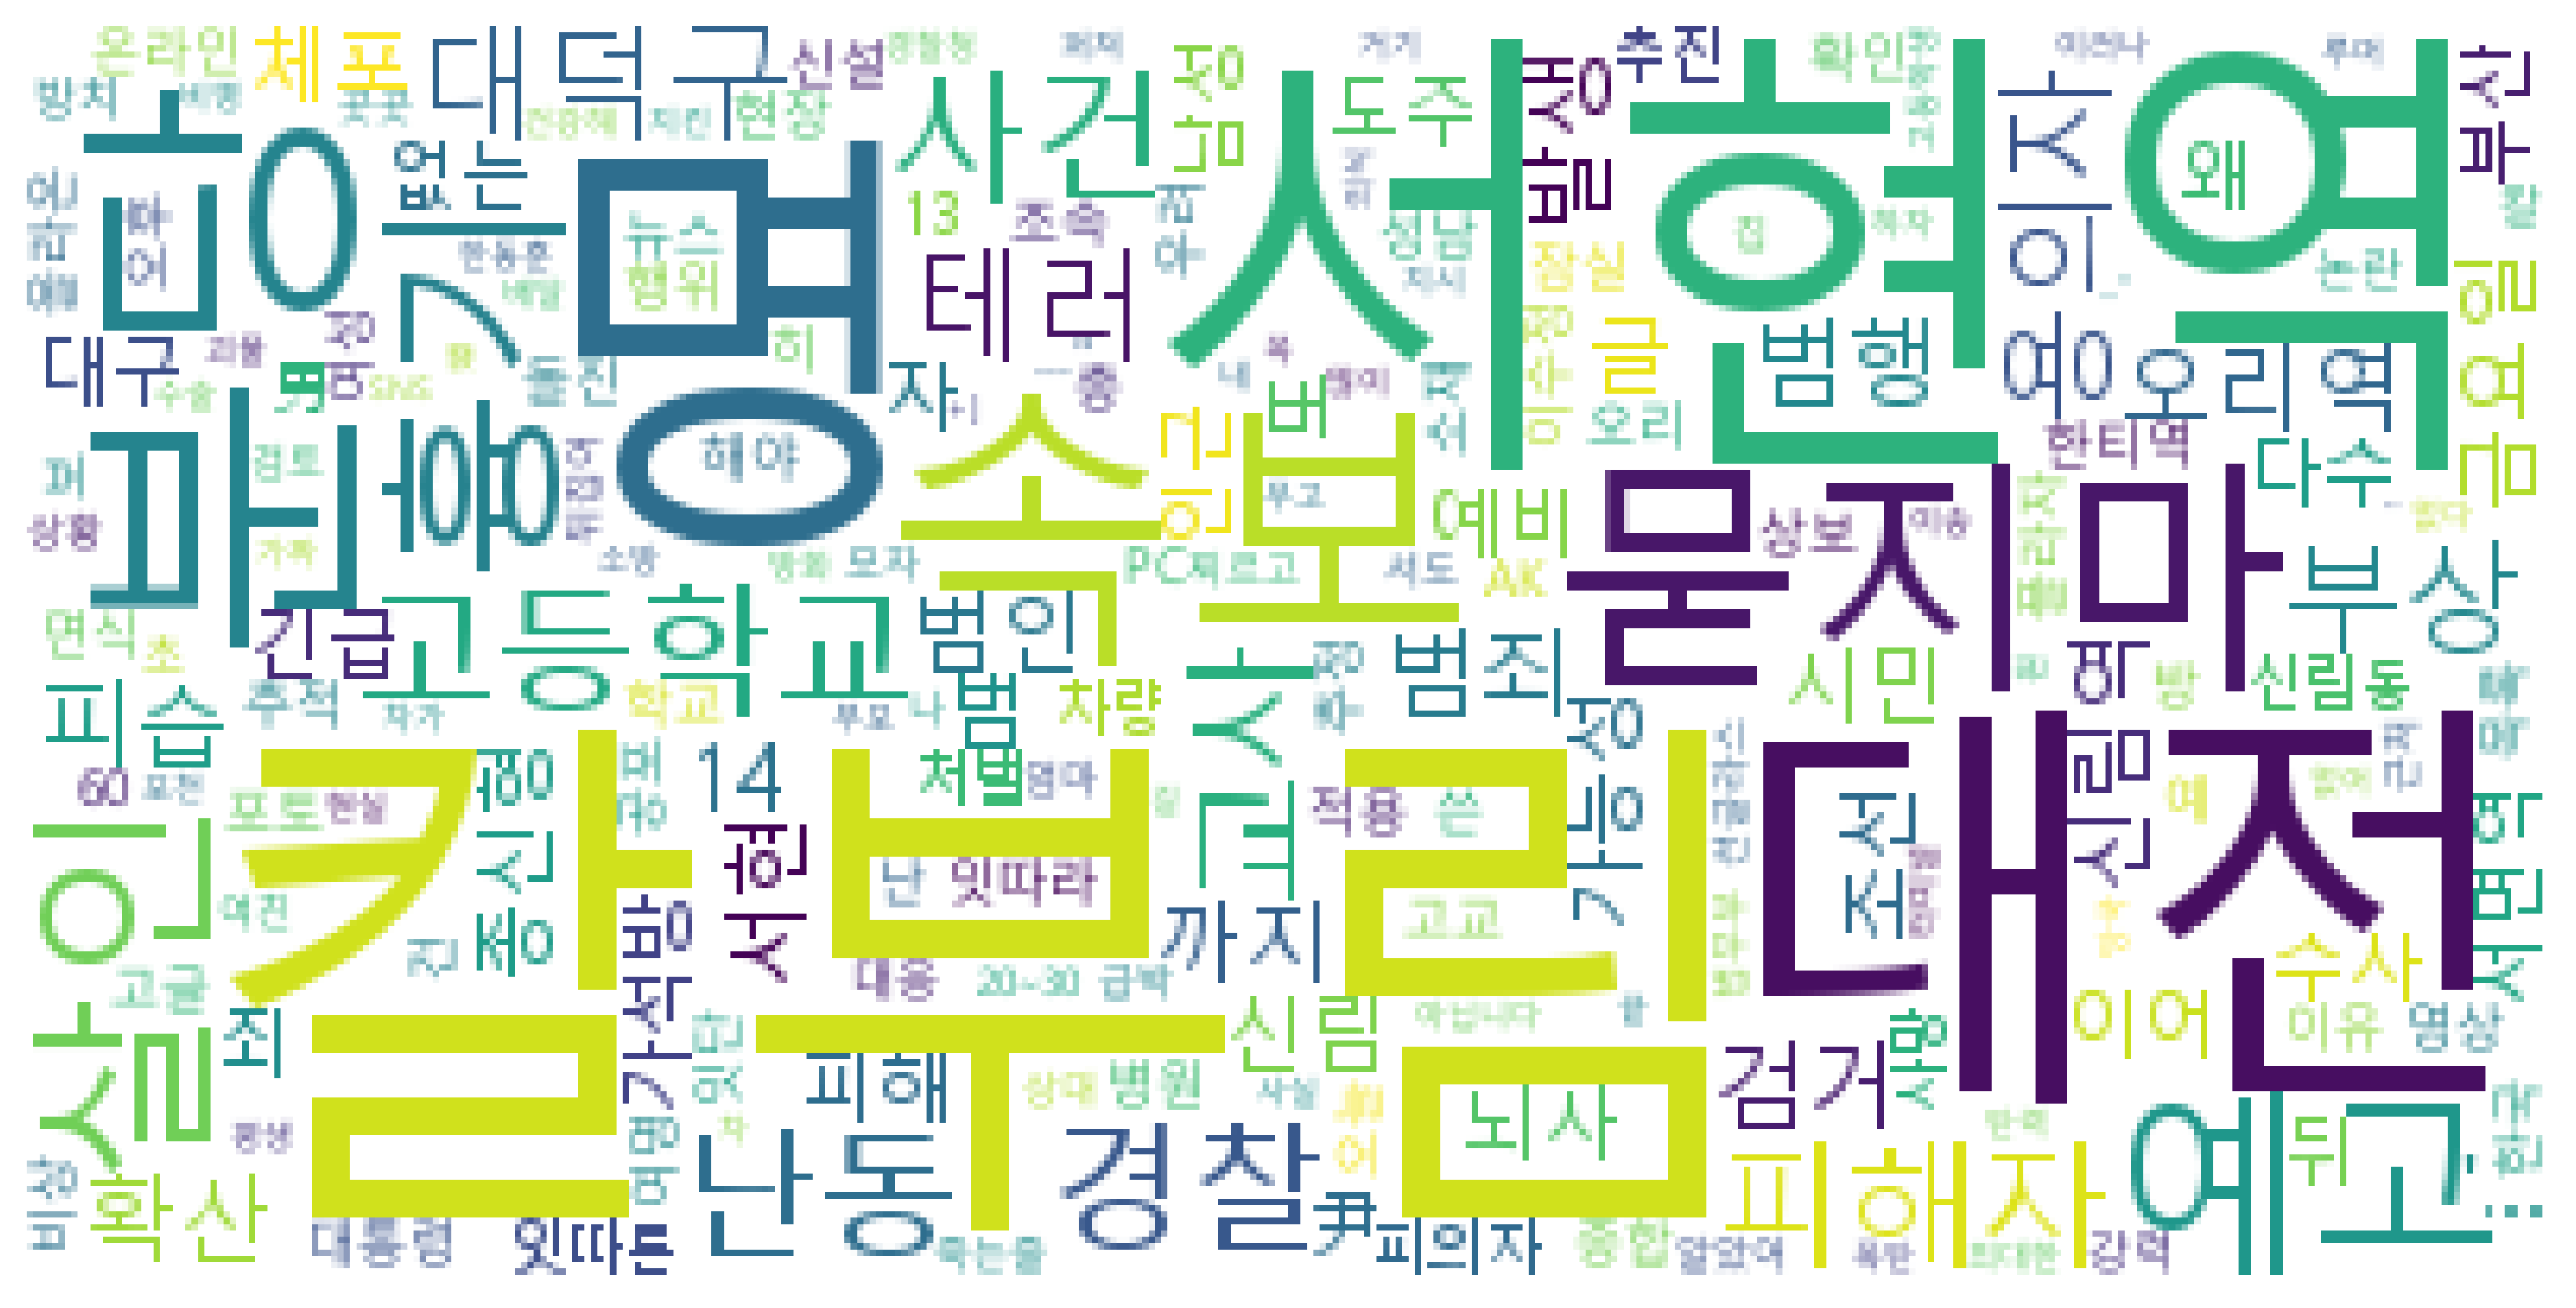

In [29]:
# 워드클라우드
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(todict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()